## Los Angeles County Person Details - Hit Shooting Incidents and Non-Hit Shooting Incidents 2010 to Present.

## Information about this dataset can be found here:

https://data.lacounty.gov/Criminal/Person-Details-Hit-Shooting-Incidents-and-Non-Hit-/t8vk-5p9p

## Import Libraries

In [194]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

## Let's read in the live data so we can stay up-to-date on the data.

#### Here we read in the file as java script object notation. The API is included in the link.

https://en.wikipedia.org/wiki/JSON

In [195]:
df = pd.read_json('https://data.lacounty.gov/resource/t8vk-5p9p.json')

In [196]:
df.columns

Index(['incident_number', 'incident_type', 'incident_date',
       'incident_location', 'city', 'state', 'zip', 'reporting_district',
       'geo_location', 'suspect_age', 'suspect_race', 'mental_health_concerns',
       'criminal_history', 'wounded', 'deceased', 'on_probation', 'on_parole',
       'under_the_influence', 'of_involved_deputies',
       'weapon_involved_category', 'weapon_involved_category_desc',
       'approx_latitude', 'approx_longitude', ':@computed_region_x8wy_s94z',
       ':@computed_region_cbw7_skn5', 'substance_name'],
      dtype='object')

In [197]:
df.head()

,incident_number,incident_type,incident_date,incident_location,city,state,zip,reporting_district,geo_location,suspect_age,suspect_race,mental_health_concerns,criminal_history,wounded,deceased,on_probation,on_parole,under_the_influence,of_involved_deputies,weapon_involved_category,weapon_involved_category_desc,approx_latitude,approx_longitude,:@computed_region_x8wy_s94z,:@computed_region_cbw7_skn5,substance_name
0,1000289,HIT SHOOTING INCIDENT,2010-01-14T15:41:00.000,500 WEST GARDENA BOULEVARD,LOS ANGELES,CA,90248.0,1699.0,"{'latitude': '33.881832', 'longitude': '-118.2...",43.0,HISPANIC,N,Y,Y,N,Y,Y,N,1,A-4,"FIREARM: Perception shooting, Suspect actions...",33.881832,-118.282796,24685,2.0,NaN
1,1000290,NON-HIT SHOOTING INCIDENT,2010-02-10T21:45:00.000,1300 WEST 139TH STREET,COMPTON,CA,90222.0,2812.0,"{'latitude': '33.90574174912721', 'longitude':...",19.0,HISPANIC,N,N,Y,N,Y,N,Y,3,A-2,"FIREARM: Suspect armed, Suspect fired at deputy",33.905742,-118.251892,24677,2.0,STIMULANT
2,1000291,HIT SHOOTING INCIDENT,2010-02-26T04:29:00.000,NORWALK BOULEVARD AND CAMBRIAN STREET,ARTESIA,CA,90701.0,1349.0,"{'latitude': '33.85705101617263', 'longitude':...",35.0,BLACK,N,N,Y,N,Y,N,N,1,B-2,"WEAPON - OTHER: Suspect armed, Suspect used w...",33.857051,-118.072289,26323,4.0,NaN
3,1000313,HIT SHOOTING INCIDENT,2010-03-06T03:30:00.000,3800 FIRESTONE BLVD.,SOUTH GATE,CA,90280.0,2199.0,"{'latitude': '33.953839', 'longitude': '-118.2...",29.0,HISPANIC,N,Y,Y,N,Y,N,N,2,A-1,"FIREARM: Suspect armed, Firearm recovered",33.953839,-118.202349,25071,1.0,NaN
4,1000313,HIT SHOOTING INCIDENT,2010-03-06T03:30:00.000,3800 FIRESTONE BLVD.,SOUTH GATE,CA,90280.0,2199.0,"{'latitude': '33.953839', 'longitude': '-118.2...",18.0,HISPANIC,N,Y,Y,N,N,Y,N,2,A-1,"FIREARM: Suspect armed, Firearm recovered",33.953839,-118.202349,25071,1.0,NaN


# Let's get some basic information about the dataset before we do anything else.

In [198]:
df.shape

(356, 26)

In [199]:
old_shape = df.shape[0] #save the column count for calculating the number of dropped columns later

### From above we can see there are 356 rows and 26 columns in the dataset

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 26 columns):
incident_number                  356 non-null int64
incident_type                    356 non-null object
incident_date                    356 non-null object
incident_location                356 non-null object
city                             355 non-null object
state                            356 non-null object
zip                              355 non-null float64
reporting_district               354 non-null float64
geo_location                     356 non-null object
suspect_age                      347 non-null float64
suspect_race                     351 non-null object
mental_health_concerns           352 non-null object
criminal_history                 348 non-null object
wounded                          324 non-null object
deceased                         325 non-null object
on_probation                     302 non-null object
on_parole                        304 non-null

### Get the number of Null values and their locations so we can figure out what we may need to do with them or not.

In [201]:
df.isnull().sum()

incident_number                    0
incident_type                      0
incident_date                      0
incident_location                  0
city                               1
state                              0
zip                                1
reporting_district                 2
geo_location                       0
suspect_age                        9
suspect_race                       5
mental_health_concerns             4
criminal_history                   8
wounded                           32
deceased                          31
on_probation                      54
on_parole                         52
under_the_influence               51
of_involved_deputies               0
weapon_involved_category           4
weapon_involved_category_desc      4
approx_latitude                    2
approx_longitude                   2
:@computed_region_x8wy_s94z        0
:@computed_region_cbw7_skn5        8
substance_name                   251
dtype: int64

## Drop rows with null values by-column name

In [202]:
df = df.dropna(how='any', subset=['on_parole', 'on_probation', 'city', 'reporting_district', 'wounded', 'deceased'])
df.isnull().sum()
new_shape = df.shape[0]

print('The number of rows dropped is ', new_shape - old_shape)
print('The current number of rows is now ', df.shape[0])

The number of rows dropped is  -70
The current number of rows is now  286


# Let's fix the 'mental_health_concerns' entries
### Let's replace the 'Y' and 'N' values in the 'mental_health_concerns' column with 1 and 0 to make it a binary column so we can do some analysis

In [203]:
# creating a dict file  
mental_health = {'Y': 1,'N': 0} 

# traversing through dataframe 
# Gender column and writing 
# values where key matches 
df.mental_health_concerns = [mental_health[item] for item in df.mental_health_concerns] 

# Let's fix the 'criminal_history' entries now

In [204]:
#let's fix the wounded column entries
# creating a dict file  
wounded_col = {'Y': 1,'N': 0} 

# traversing through dataframe 
# Gender column and writing 
# values where key matches 
df.wounded = [wounded_col[item] for item in df.wounded]
####################################################################################

In [205]:
# creating a dict file  
crim_hist = {'Y': 1,'N': 0} 

# traversing through dataframe 
# Gender column and writing 
# values where key matches 
df.criminal_history = [crim_hist[item] for item in df.criminal_history]
###################################################################################

In [206]:
#let's fix the deceased column entries
# creating a dict file  
deceased_col = {'Y': 1,'N': 0} 

# traversing through dataframe 
# Gender column and writing 
# values where key matches 
df.deceased = [deceased_col[item] for item in df.deceased]
####################################################################################

In [207]:
pd.set_option('display.max_columns', None)
df.head()

,incident_number,incident_type,incident_date,incident_location,city,state,zip,reporting_district,geo_location,suspect_age,suspect_race,mental_health_concerns,criminal_history,wounded,deceased,on_probation,on_parole,under_the_influence,of_involved_deputies,weapon_involved_category,weapon_involved_category_desc,approx_latitude,approx_longitude,:@computed_region_x8wy_s94z,:@computed_region_cbw7_skn5,substance_name
0,1000289,HIT SHOOTING INCIDENT,2010-01-14T15:41:00.000,500 WEST GARDENA BOULEVARD,LOS ANGELES,CA,90248.0,1699.0,"{'latitude': '33.881832', 'longitude': '-118.2...",43.0,HISPANIC,0,1,1,0,Y,Y,N,1,A-4,"FIREARM: Perception shooting, Suspect actions...",33.881832,-118.282796,24685,2.0,NaN
1,1000290,NON-HIT SHOOTING INCIDENT,2010-02-10T21:45:00.000,1300 WEST 139TH STREET,COMPTON,CA,90222.0,2812.0,"{'latitude': '33.90574174912721', 'longitude':...",19.0,HISPANIC,0,0,1,0,Y,N,Y,3,A-2,"FIREARM: Suspect armed, Suspect fired at deputy",33.905742,-118.251892,24677,2.0,STIMULANT
2,1000291,HIT SHOOTING INCIDENT,2010-02-26T04:29:00.000,NORWALK BOULEVARD AND CAMBRIAN STREET,ARTESIA,CA,90701.0,1349.0,"{'latitude': '33.85705101617263', 'longitude':...",35.0,BLACK,0,0,1,0,Y,N,N,1,B-2,"WEAPON - OTHER: Suspect armed, Suspect used w...",33.857051,-118.072289,26323,4.0,NaN
3,1000313,HIT SHOOTING INCIDENT,2010-03-06T03:30:00.000,3800 FIRESTONE BLVD.,SOUTH GATE,CA,90280.0,2199.0,"{'latitude': '33.953839', 'longitude': '-118.2...",29.0,HISPANIC,0,1,1,0,Y,N,N,2,A-1,"FIREARM: Suspect armed, Firearm recovered",33.953839,-118.202349,25071,1.0,NaN
4,1000313,HIT SHOOTING INCIDENT,2010-03-06T03:30:00.000,3800 FIRESTONE BLVD.,SOUTH GATE,CA,90280.0,2199.0,"{'latitude': '33.953839', 'longitude': '-118.2...",18.0,HISPANIC,0,1,1,0,N,Y,N,2,A-1,"FIREARM: Suspect armed, Firearm recovered",33.953839,-118.202349,25071,1.0,NaN


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 0 to 343
Data columns (total 26 columns):
incident_number                  286 non-null int64
incident_type                    286 non-null object
incident_date                    286 non-null object
incident_location                286 non-null object
city                             286 non-null object
state                            286 non-null object
zip                              286 non-null float64
reporting_district               286 non-null float64
geo_location                     286 non-null object
suspect_age                      286 non-null float64
suspect_race                     286 non-null object
mental_health_concerns           286 non-null int64
criminal_history                 286 non-null int64
wounded                          286 non-null int64
deceased                         286 non-null int64
on_probation                     286 non-null object
on_parole                        286 non-null obj

# Do some Initial Visualizations.

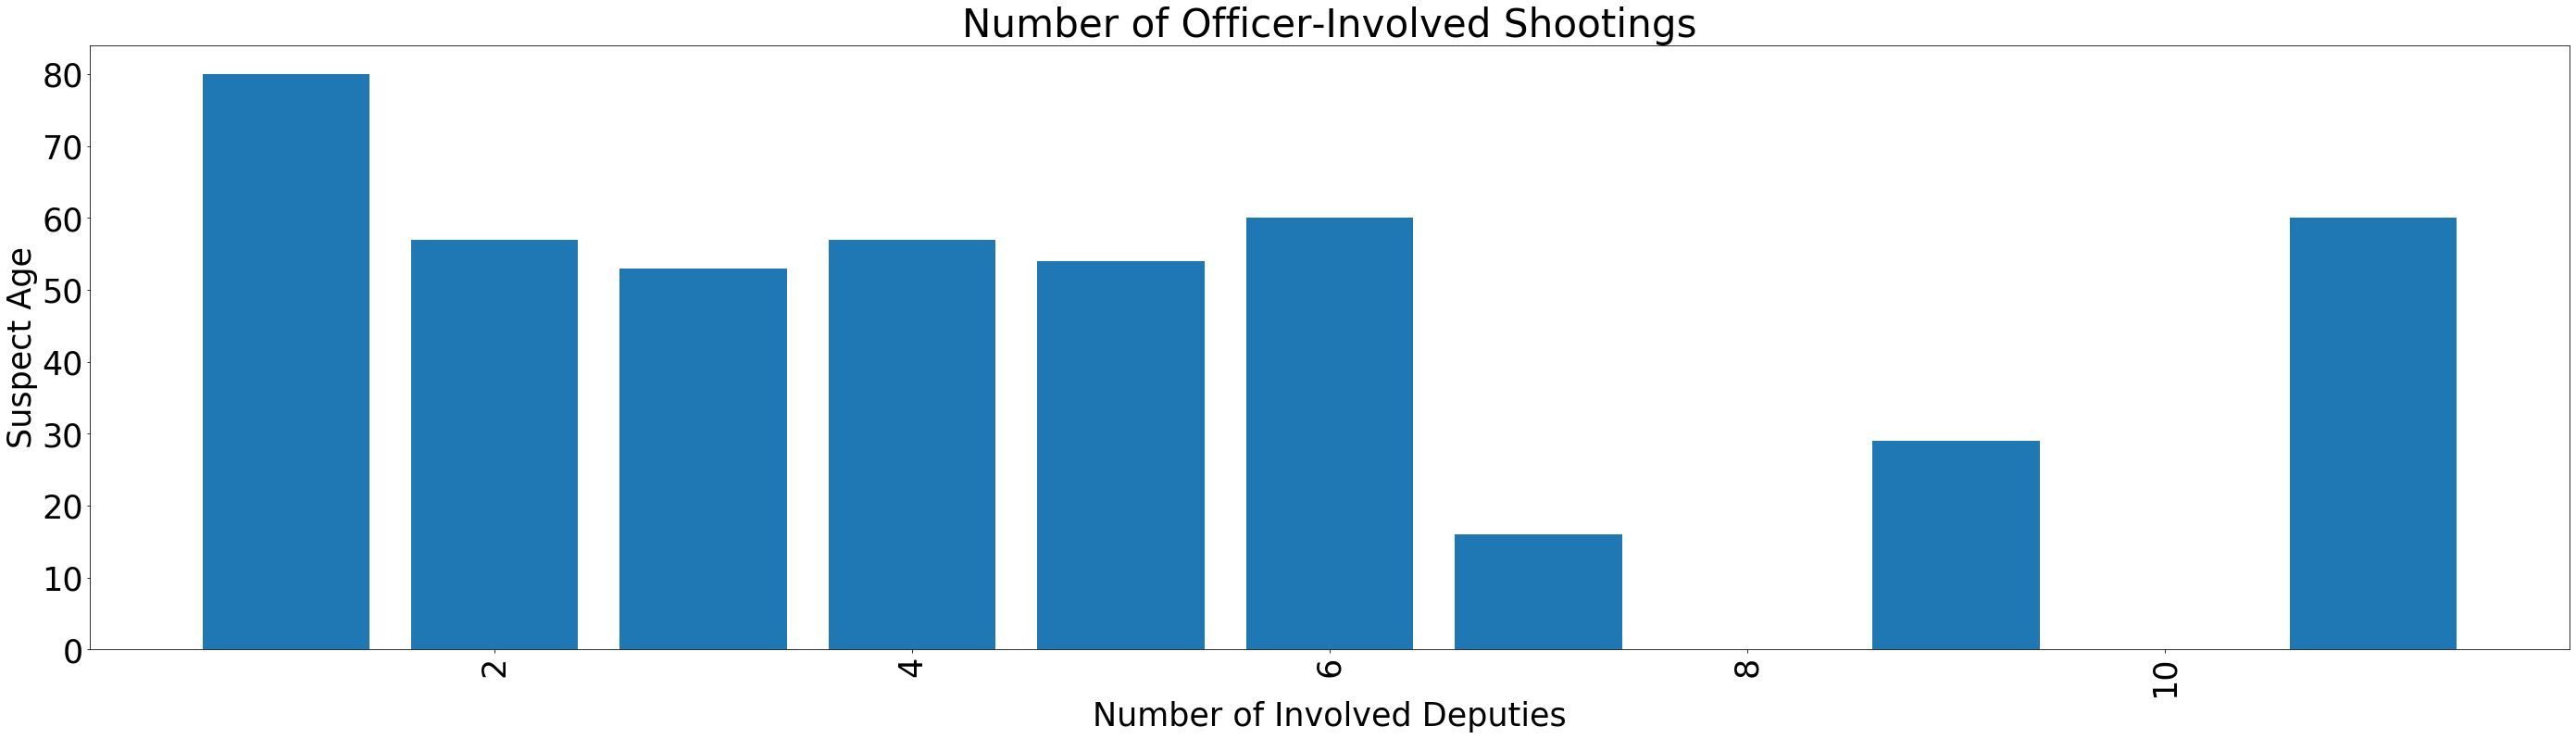

In [209]:
plt.figure(figsize=[48, 12])
plt.rcParams.update({'font.size': 35})
plt.bar(df['of_involved_deputies'], df['suspect_age'])
plt.xlabel('Number of Involved Deputies')
plt.ylabel('Suspect Age')
plt.title('Number of Officer-Involved Shootings')
plt.xticks(rotation=90)

plt.show()

### Notice that there were 7 officers involved in the shooting incident of the 20-year-old and one officer involved in the shooting incident of the 80-year-old whereas, there were 11 officers involved in the incident with the 55-year-old suspect. So far no obvious pattern due to age of suspect.